## README

Each output in this file is an arena plotted within its image extent... The rectangle is exactly the same in both figures. The arena of the second output must be distorted in photoshop in order to hole-match with the first arena.

Then, in the distorted photoshop picture, having the second arena distorted on top of the first, you must mark the coordinates of the rectangle around the second arena (that is now distorted). Then, use engauge to extract those coordinates in the axis of the first (background, used as reference) arena... These extracted rectangle coordinates must go in the transform functions in the process_mouse_trials_lib module.

In [2]:
import os
import copy
import numpy
import modules.io as io
import modules.plot_func as pltt
import modules.traj_analysis as tran
import modules.edge_detector as edged
import modules.helper_func_class as misc
import modules.traj_to_step_matrix as tstep
import modules.process_mouse_trials_lib as plib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

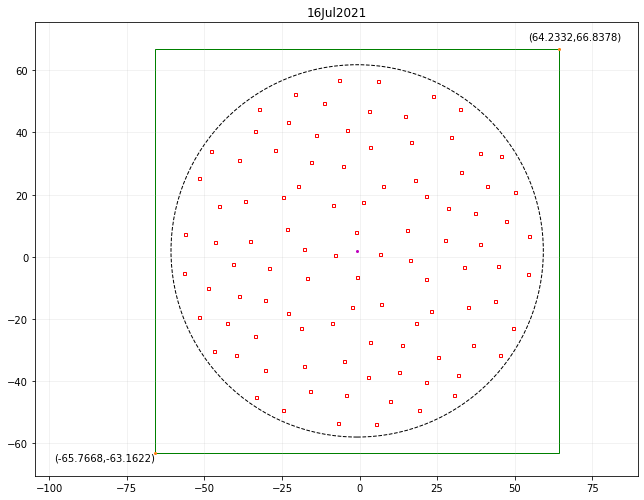

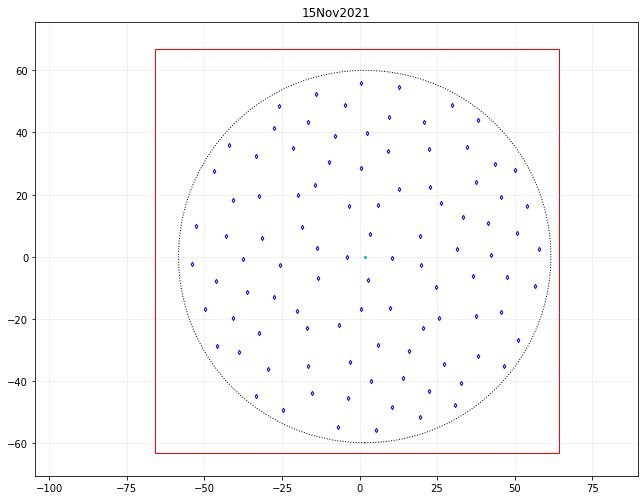

In [2]:
debug_input_dir = 'debug_preprocess'
experiment1_dir  = ['mouse_37','mouse_38','mouse_39','mouse_40']
experiment2_dir  = ['mouse_53','mouse_54','mouse_55','mouse_56']
all_trials_ft1,_ = io.load_trial_file([ os.path.join(debug_input_dir,md) for md in experiment1_dir  ],load_only_training_sessions_relative_target=True ,skip_15_relative_target=True ,use_extra_trials_relative_target=False,sort_by_trial=True,fix_nan=True,remove_after_food=False,align_to_top=False,group_by='trial',return_group_by_keys=True,max_trial_number=14)
all_trials_ft2,_ = io.load_trial_file([ os.path.join(debug_input_dir,md) for md in experiment2_dir  ],load_only_training_sessions_relative_target=True ,skip_15_relative_target=True ,use_extra_trials_relative_target=False,sort_by_trial=True,fix_nan=True,remove_after_food=False,align_to_top=False,group_by='trial',return_group_by_keys=True,max_trial_number=14)

m1,m2 = all_trials_ft1[0][0],all_trials_ft2[0][0]
fig_w,fig_h = 10,7
arena_wh = m1.arena_picture_wh #get_arena_picture_file_width_height()
ax_w = 1.2
ax_hw_ratio = arena_wh[1] / arena_wh[0] # h and w of the arena_picture
ax_h = ax_w * ax_hw_ratio

rect_p0 = m1.r_arena_center - m1.arena_diameter/2-5
rect_L  = m1.arena_diameter+10
rect_p1 = rect_p0 + numpy.array((rect_L,rect_L))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor='k')
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor=(0,0,0,0))
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='g')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color='r',       linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='d', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color='m',       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color=(0,0,0,0), markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(rect_p0,'(%g,%g)'%tuple(rect_p0),'o',color='tab:orange',      markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(rect_p1,'(%g,%g)'%tuple(rect_p1),'o',color='tab:orange',      markersize=2,ax=ax,pointArgs=dict(fillstyle='full'), pad=(-10,3))
ax.set_title('%s'%(m1.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m1.exper_date}.png',format='png',dpi=300,bbox_inches='tight')
#ax[0].axis('off')
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor='k')
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='r')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='d', color='b'      , linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color='c'      ,       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
ax.set_title('%s'%(m2.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m2.exper_date}.png',format='png',dpi=300,bbox_inches='tight')
#ax[1].axis('off')


plt.show()

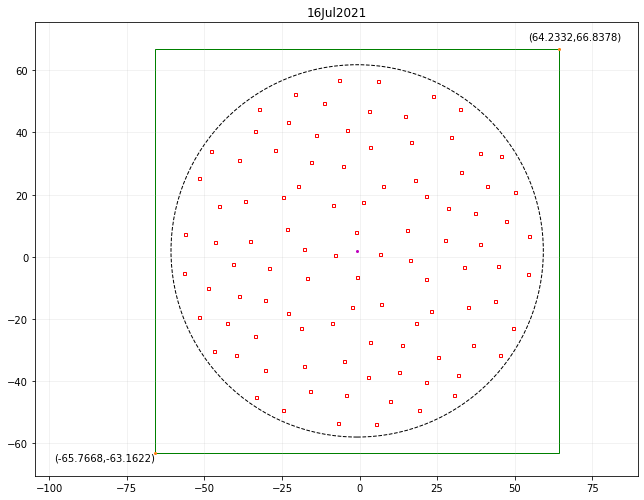

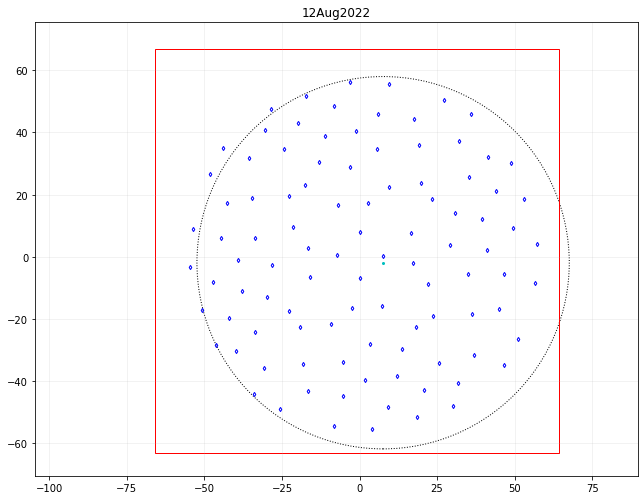

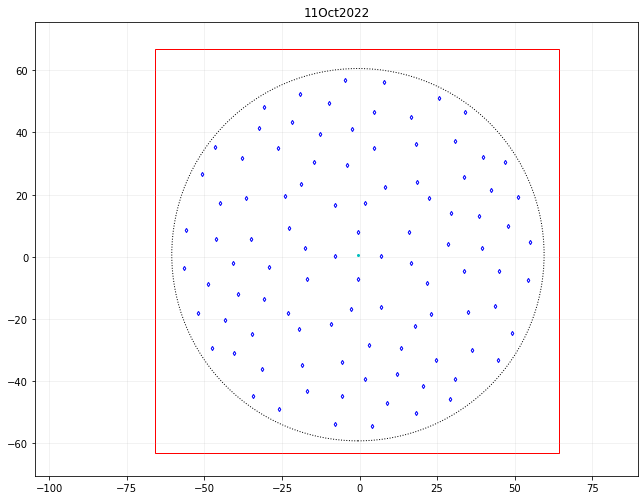

In [4]:
debug_input_dir  = 'debug_preprocess'
experiment1_dir  = ['mouse_37','mouse_38','mouse_39','mouse_40']
experiment2_dir  = ['mouse_69','mouse_70','mouse_71','mouse_72']
experiment3_dir  = ['mouse_1','mouse_2','mouse_3','mouse_4','mouse_5','mouse_6','mouse_7','mouse_8']
all_trials_ft1,_ = io.load_trial_file([ os.path.join(debug_input_dir,md) for md in experiment1_dir  ],load_only_training_sessions_relative_target=True ,skip_15_relative_target=True ,use_extra_trials_relative_target=False,sort_by_trial=True,fix_nan=True,remove_after_food=False,align_to_top=False,group_by='trial',return_group_by_keys=True,max_trial_number=14)
all_trials_ft2   = io.load_trial_file([ os.path.join(debug_input_dir,md) for md in experiment2_dir  ],load_only_training_sessions_relative_target=False ,skip_15_relative_target=False ,use_extra_trials_relative_target=True,sort_by_trial=True,fix_nan=True,remove_after_food=False,align_to_top=False)
all_trials_ft3   = list(misc.flatten_list(io.load_track_simple([ os.path.join(debug_input_dir,'two_targets_rot_mixsex',md) for md in experiment3_dir  ]),only_lists=True))
#io.load_trial_file([ os.path.join(debug_input_dir,'two_targets_rot_mixsex',md) for md in experiment3_dir  ],load_only_training_sessions_relative_target=False ,skip_15_relative_target=False ,use_extra_trials_relative_target=True,sort_by_trial=True,fix_nan=True,remove_after_food=False,align_to_top=False)

m1,m2,m3 = all_trials_ft1[0][0],all_trials_ft2[0],all_trials_ft3[0]
fig_w,fig_h = 10,7
arena_wh = m1.arena_picture_wh #get_arena_picture_file_width_height()
ax_w = 1.2
ax_hw_ratio = arena_wh[1] / arena_wh[0] # h and w of the arena_picture
ax_h = ax_w * ax_hw_ratio

rect_p0 = m1.r_arena_center - m1.arena_diameter/2-5
rect_L  = m1.arena_diameter+10
rect_p1 = rect_p0 + numpy.array((rect_L,rect_L))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor='k')
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor=(0,0,0,0))
pltt.draw_circle(m3.r_arena_center,m3.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor=(0,0,0,0))
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='g')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color='r',       linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='d', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m3.r_arena_holes ,       ax=ax, marker='d', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color='m',       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color=(0,0,0,0), markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m3.r_arena_center,'','o',color=(0,0,0,0), markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(rect_p0,'(%g,%g)'%tuple(rect_p0),'o',color='tab:orange',      markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(rect_p1,'(%g,%g)'%tuple(rect_p1),'o',color='tab:orange',      markersize=2,ax=ax,pointArgs=dict(fillstyle='full'), pad=(-10,3))
ax.set_title('%s'%(m1.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m1.exper_date}_align2.png',format='png',dpi=300,bbox_inches='tight')
#ax[0].axis('off')
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor='k')
pltt.draw_circle(m3.r_arena_center,m3.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='r')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='d', color='b'      , linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m3.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color='c'      ,       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m3.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
ax.set_title('%s'%(m2.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m2.exper_date}.png',format='png',dpi=300,bbox_inches='tight')
#
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_circle(m3.r_arena_center,m3.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor='k')
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='r')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m3.r_arena_holes ,       ax=ax, marker='d', color='b'      , linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m3.r_arena_center,'','o',color='c'      ,       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
ax.set_title('%s'%(m3.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m3.exper_date}.png',format='png',dpi=300,bbox_inches='tight')
#ax[1].axis('off')

plt.show()

In [ ]:
debug_input_dir  = 'debug_preprocess'
experiment1_dir  = ['mouse_37','mouse_38','mouse_39','mouse_40']
all_trials_ft1,_ = io.load_trial_file([ os.path.join(debug_input_dir,md) for md in experiment1_dir  ],load_only_training_sessions_relative_target=True ,skip_15_relative_target=True ,use_extra_trials_relative_target=False,sort_by_trial=True,fix_nan=True,remove_after_food=False,align_to_top=False,group_by='trial',return_group_by_keys=True,max_trial_number=14)


m1 = all_trials_ft1[0][0]


m2 = misc.structtype(r_arena_center=numpy.array([ 1.3975, -0.1575]),
                     arena_diameter=m1.arena_diameter,
                     r_arena_holes=numpy.array([]),
                     )




fig_w,fig_h = 10,7
arena_wh = m1.arena_picture_wh #get_arena_picture_file_width_height()
ax_w = 1.2
ax_hw_ratio = arena_wh[1] / arena_wh[0] # h and w of the arena_picture
ax_h = ax_w * ax_hw_ratio

rect_p0 = m1.r_arena_center - m1.arena_diameter/2-5
rect_L  = m1.arena_diameter+10
rect_p1 = rect_p0 + numpy.array((rect_L,rect_L))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor='k')
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor=(0,0,0,0))
pltt.draw_circle(m3.r_arena_center,m3.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor=(0,0,0,0))
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='g')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color='r',       linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='d', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m3.r_arena_holes ,       ax=ax, marker='d', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color='m',       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color=(0,0,0,0), markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m3.r_arena_center,'','o',color=(0,0,0,0), markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(rect_p0,'(%g,%g)'%tuple(rect_p0),'o',color='tab:orange',      markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(rect_p1,'(%g,%g)'%tuple(rect_p1),'o',color='tab:orange',      markersize=2,ax=ax,pointArgs=dict(fillstyle='full'), pad=(-10,3))
ax.set_title('%s'%(m1.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m1.exper_date}_align2.png',format='png',dpi=300,bbox_inches='tight')
#ax[0].axis('off')
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor='k')
pltt.draw_circle(m3.r_arena_center,m3.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='r')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='d', color='b'      , linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m3.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color='c'      ,       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m3.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
ax.set_title('%s'%(m2.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m2.exper_date}.png',format='png',dpi=300,bbox_inches='tight')
#
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(fig_w,fig_h))
pltt.draw_circle(m1.r_arena_center,m1.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_circle(m2.r_arena_center,m2.arena_diameter/2,ax=ax,linestyle='--',edgecolor=(0,0,0,0))
pltt.draw_circle(m3.r_arena_center,m3.arena_diameter/2,ax=ax,linestyle=':' ,edgecolor='k')
pltt.draw_rectangle(rect_p0, rect_L, rect_L,ax=ax,linestyle='-',edgecolor='r')
pltt.plot_trajectory_points(  m1.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m2.r_arena_holes ,       ax=ax, marker='s', color=(0,0,0,0), linestyle='none', fillstyle='none',markersize=3)
pltt.plot_trajectory_points(  m3.r_arena_holes ,       ax=ax, marker='d', color='b'      , linestyle='none', fillstyle='none',markersize=3)
pltt.plot_point(m1.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m2.r_arena_center,'','o',color=(0,0,0,0),       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
pltt.plot_point(m3.r_arena_center,'','o',color='c'      ,       markersize=2,ax=ax,pointArgs=dict(fillstyle='full'))
ax.set_title('%s'%(m3.exper_date))
ax.set_aspect('equal')
ax.set_position([ (1.0-ax_w)/2.0, (1.0-ax_h)/2.0, ax_w, ax_h ])
ax.set_xlim([m1.arena_pic_left  , m1.arena_pic_right ])
ax.set_ylim([m1.arena_pic_bottom, m1.arena_pic_top   ])
ax.set_autoscale_on(False)
ax.grid(visible=True,which='major',axis='both',alpha=0.2)
plt.savefig(f'arena_picture/distort/arenas_experiments_{m3.exper_date}.png',format='png',dpi=300,bbox_inches='tight')
#ax[1].axis('off')

plt.show()